In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

print('Numpy version: ', np.__version__)
print('Oandas version: ',pd.__version__)
print('Seaborn version: ',sns.__version__)

Numpy version:  1.19.5
Oandas version:  1.3.5
Seaborn version:  0.11.2


In [2]:
rcParams['figure.figsize'] = (30,14)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_sample_submission_gm6gE0l = pd.read_csv('/content/drive/MyDrive/rakamin/Final_Project/dataset/sample_submission_gm6gE0l.csv')
df_test_O6kKpvt = pd.read_csv('/content/drive/MyDrive/rakamin/Final_Project/dataset/test_O6kKpvt.csv')
df_train_20D8GL3 = pd.read_csv('/content/drive/MyDrive/rakamin/Final_Project/dataset/train_20D8GL3.csv')

# 1. Pengecekan deskripsi statistik data

In [5]:
df_sample_submission_gm6gE0l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          9000 non-null   int64
 1   default_payment_next_month  9000 non-null   int64
dtypes: int64(2)
memory usage: 140.8 KB


In [6]:
df_test_O6kKpvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         9000 non-null   int64
 1   LIMIT_BAL  9000 non-null   int64
 2   SEX        9000 non-null   int64
 3   EDUCATION  9000 non-null   int64
 4   MARRIAGE   9000 non-null   int64
 5   AGE        9000 non-null   int64
 6   PAY_0      9000 non-null   int64
 7   PAY_2      9000 non-null   int64
 8   PAY_3      9000 non-null   int64
 9   PAY_4      9000 non-null   int64
 10  PAY_5      9000 non-null   int64
 11  PAY_6      9000 non-null   int64
 12  BILL_AMT1  9000 non-null   int64
 13  BILL_AMT2  9000 non-null   int64
 14  BILL_AMT3  9000 non-null   int64
 15  BILL_AMT4  9000 non-null   int64
 16  BILL_AMT5  9000 non-null   int64
 17  BILL_AMT6  9000 non-null   int64
 18  PAY_AMT1   9000 non-null   int64
 19  PAY_AMT2   9000 non-null   int64
 20  PAY_AMT3   9000 non-null   int64
 21  PAY_AMT4   900

In [7]:
# informasi general tentang dataframe
df_train_20D8GL3.info()
# LIMIT_BAL = Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit
# MARRIAGE = Marital status
# PAY_0 - PAY_6 = Repayment status start from September to April 2005 (NT dollar)
# BILL_AMT1 - BILL_AMT1  = Amount of bill statement start from September - April 2005 (NT dollar)
# PAY_AMT1 = Amount of previous payment start from September to April 2005 (NT dollar)               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [8]:
df_train_20D8GL3.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
19025,21216,140000,1,1,2,44,0,0,0,0,2,0,72763,75064,76892,79522,79623,80895,3905,4025,4924,2381,2926,3108,0
11228,1417,30000,2,3,2,24,-1,-1,-1,-1,-1,-1,4882,14630,6323,2870,1485,3926,14630,6485,2870,1485,3926,0,0
301,4394,50000,2,1,2,29,0,0,0,0,0,0,38242,28797,16068,16387,16882,17350,1799,2000,582,754,893,943,0
10992,21923,240000,2,2,1,27,0,0,0,0,0,0,240428,235782,129479,125584,128752,130651,7227,4486,3557,4235,3593,349,0
19737,11789,80000,1,1,2,27,-2,-2,-2,-2,-2,-2,2049,805,1672,12205,3487,24764,2003,2019,12241,3510,24843,4001,0


In [9]:
df_train_20D8GL3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14949.183667,8632.775153,1.0,7508.75,14939.5,22386.75,29998.0
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0


# Pengamatan;

`df_train_20D8GL3.info()`:

1. Dataset terdiri dari 25 kolom dan 21000 baris. dan tidak terdapat null value.
2. Setiap kolom telah memiliki tipe data yang sesuai, setiap kolom memiliki value berupa numerik dan tipe datanya sudah sesuai yaitu int.
3. Terdapat penamaan kolom yang kurang selaras yaitu setelah kolom `PAY_0` langsung ke `PAY_2`, sementara pada `BILL_AMT` dan `PAY_AMT` diawali dengan 1 bukan 0 dan definisi kolomnya urut sesuai defngan `BILL_AMT` dan `PAY_AMT`.
4. Kolom `ID` akan didrop karena merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
 

`df_train_20D8GL3.sample(5)`:

* Berdasarkan nilai summary dari dataset, dapat diamati bahwa:
    1. Terdapat nilai yang belum terdefinisi dalam dataset kolom `PAY_0 - PAY_6`, yaitu nilai 0 dan -2.
    2. Terdapat nilai yang belum terdefinisi dalam dataset kolom `MARRIAGE`, yaitu nilai 0.
    3. Terdapat nilai minus pada nilai min untuk kolom BILL_AMT1 - BILL_AMT6, dimana seharusnya untuk jumlah bill statement tidak ada yang bernilai negatif.
    4. Kolom `default_payment_next_month` ternyata bernilai boolean/binary
    5. Kolom `SEX, EDUCATION, MARRIAGE, PAY_0 - PAY_6`, `default_payment_next_month` tampaknya merupakan data kategorikal yang direpresentasikan menggunakan numerik.
    

`df_train_20D8GL3.describe().transpose()`:

1. Hanya kolom `AGE` yang tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `LIMIT_BAL, BILL_AMT1 - BILL_AMT6, PAY_AMT1 - PAY_AMT6` sepertinya right skewed.
    * Kolom `LIMIT_BAL, PAY_AMT1 - PAY_AMT6` memiliki nilai mean > median dan selisih percentil 75 dengan max sangat jauh.
    * `BILL_AMT1 - BILL_AMT6` memiliki nilai mean > median.


In [10]:
# pengelompokan kolom berdasarkan jenisnya
categoricals = ['SEX', 'EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'MARRIAGE', 'default_payment_next_month']

In [11]:
# karena value dari kolom kategorikal berupa numerik dan tidak ingin merubah tipe data di dataframe asli, maka dibuatlah dataframe baru
df_cats = df_train_20D8GL3[categoricals].copy() 
df_cats = df_cats.astype(str)
df_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SEX                         21000 non-null  object
 1   EDUCATION                   21000 non-null  object
 2   PAY_0                       21000 non-null  object
 3   PAY_2                       21000 non-null  object
 4   PAY_3                       21000 non-null  object
 5   PAY_4                       21000 non-null  object
 6   PAY_5                       21000 non-null  object
 7   PAY_6                       21000 non-null  object
 8   MARRIAGE                    21000 non-null  object
 9   default_payment_next_month  21000 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


In [12]:
df_cats.describe()

,SEX,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,MARRIAGE,default_payment_next_month
count,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,2,7,11,11,11,10,10,10,4,2
top,2,2,0,0,0,0,0,0,2,0
freq,12759,9789,10324,11043,11056,11542,11852,11450,11184,16355


In [13]:
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(df_train_20D8GL3[col].value_counts())
    print()
#SEX
    # Gender (1=male, 2=female)
#EDUCATION
    # 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#MARRIAGE
    # Marital status (1=married, 2=single, 3=divorced)
#default_payment_next_month
    # Target Variable: Default payment (1=yes, 0=no)
#PAY_0
    # Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

Value count kolom SEX:
2    12759
1     8241
Name: SEX, dtype: int64

Value count kolom EDUCATION:
2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64

Value count kolom PAY_0:
 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_0, dtype: int64

Value count kolom PAY_2:
 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64

Value count kolom PAY_3:
 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: PAY_3, dtype: int64

Value count kolom PAY_4:
 0    11542
-1     3949
-2     3047
 2     2208
 3      135
 4       51
 7       43
 5       19
 6        4
 8        2
Name: PAY_4, dtype: int64

Value count kolom PAY_5:
 0    11852
-1     3840
-2     3193
 2     1869
 3 

# Pengamatan:

Jumlah data dalam kategori yang belum terdefinisi (yang kemudian akan dijadikan pertimbangan apakah akan didrop atau akan di redefinisi berdasarkan isi datanya):
* Pada kolom `EDUCATION` nilai 0 ada 10. Nilai 0 belum terdefinisi
* Pada kolom `PAY_0` nilai 0 ada 10324, dan nilai -2 ada 1923. nilai 0 dan -2 belum terdefinisi
* Pada kolom `PAY_2` nilai 0 ada 11043, dan nilai -2 ada 2643. nilai 0 dan -2 belum terdefinisi
* Pada kolom `PAY_3` nilai 0 ada 11056, dan nilai -2 ada 2868. 
* Pada kolom `PAY_4` nilai 0 ada 11542, dan nilai -2 ada 3047. 
* Pada kolom `PAY_5` nilai 0 ada 11852, dan nilai -2 ada 3193. 
* Pada kolom `PAY_6` nilai 0 ada 11450, dan nilai -2 ada 3427. 
* Pada kolom `MARRIAGE` nilai 0 ada 36. Nilai 0 belum terdefinisi


Dominasi data:
* Kategori pada PAY_0 - PAY_6 cukup banyak (>8)
* Kolom default_payment_next_month yang merupakan label pada dataset menunjukkan class imbalance dengan persentase kategori 0 (not default) sebesar 78%.
* Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh perempuan (kolom SEX) dan orang dengn status single (kolom MARRIAGE).

# 2. Pengecekan distribusi setiap features terhadap variabel target

# Barplot untuk melihat perbandingan distribusi data per kategori untuk setiap kolomnya

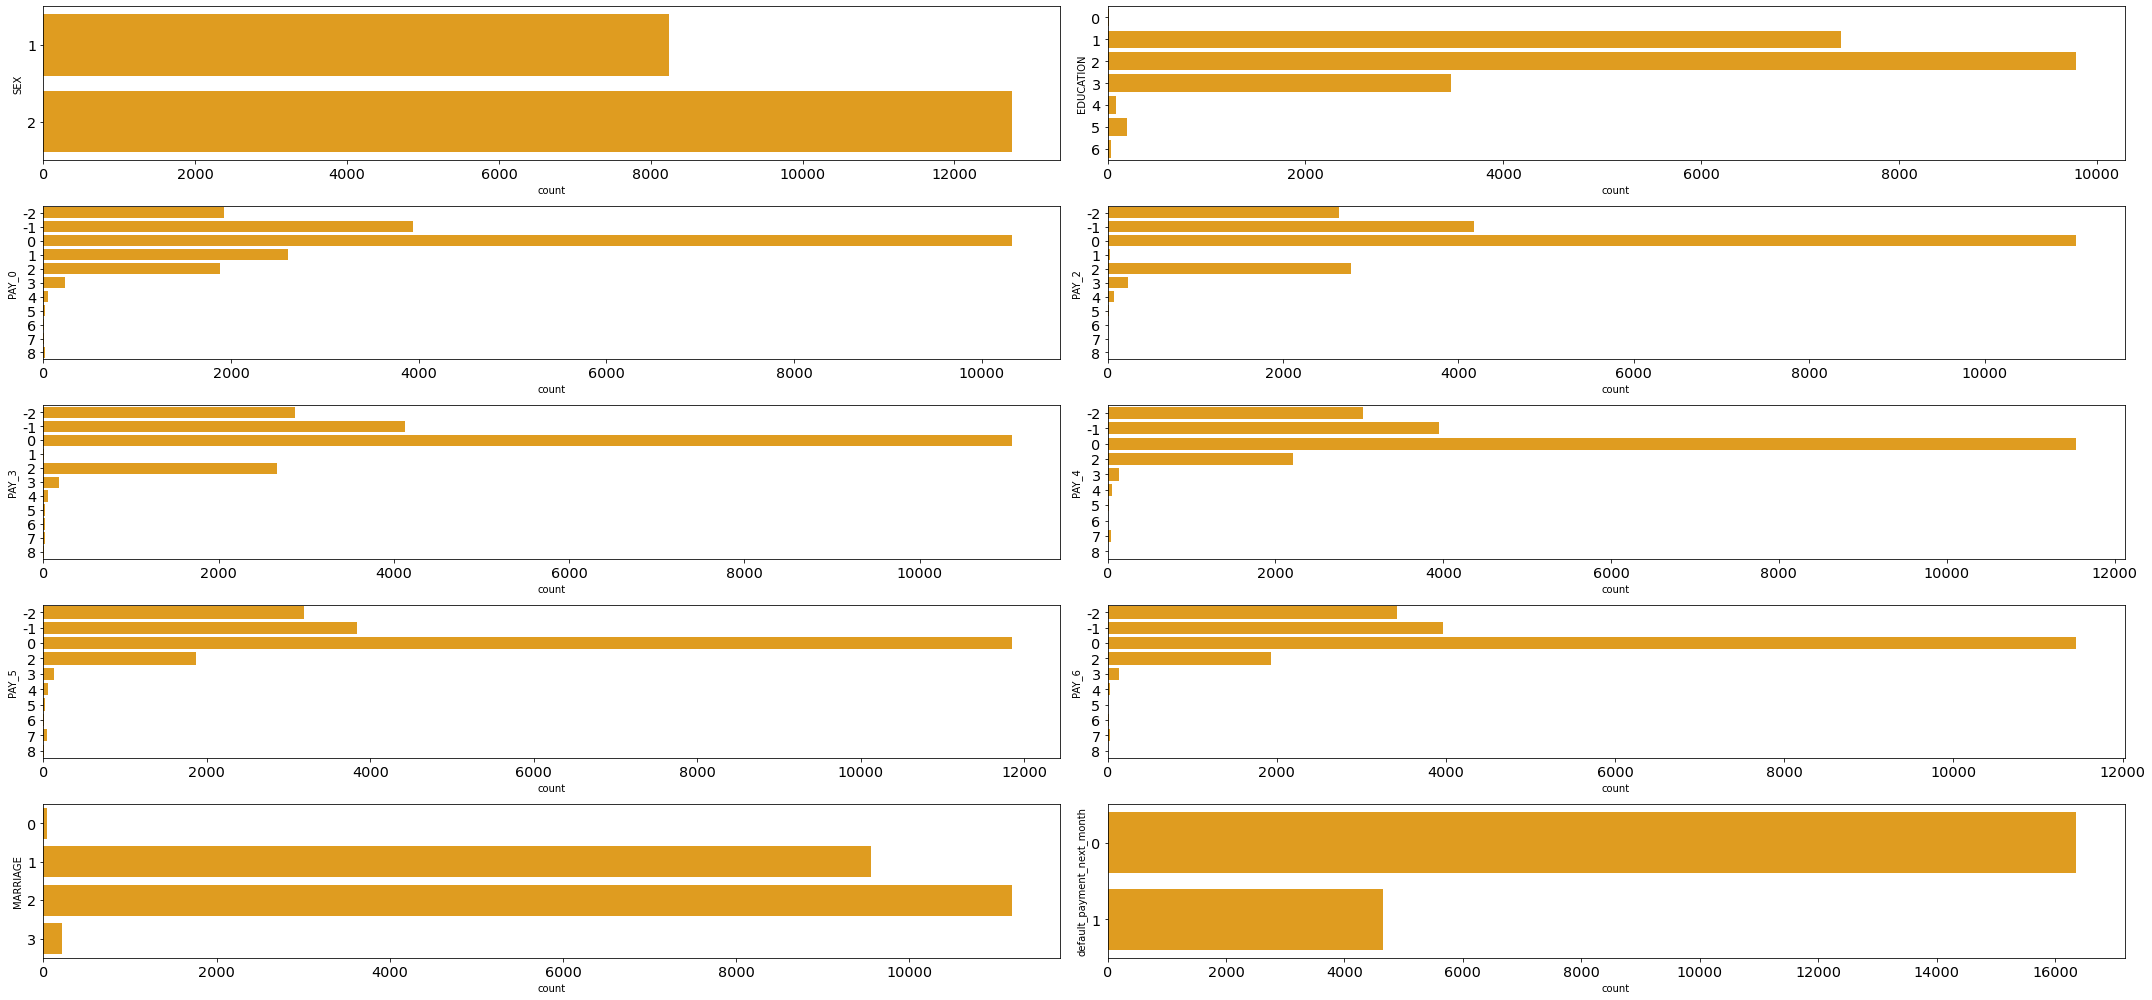

In [14]:
for i in range(0, len(categoricals)):
    plt.subplot(5, 2, i+1)
    sns.countplot(y = df_train_20D8GL3[categoricals[i]], color='orange', orient='v')
    plt.tight_layout()

Pengamatan:
1. SEX didominasi oleh kategori 2 (female)
2. EDUCATION didominasi oleh kategori 2 (university)
3. PAY_0 - PAY_6 didominasi oleh kategori 0 (tidak terdefinisi di dataset) dan terdapat jumlah kategori yang cukup banyak
4. MARRIAGE didominasi oleh kategori 2 (single) dan disusul oleh kategori 1 (married)
5. default_payment_next_month didominasi oleh 0 (not default), tampak bahwa terdapat class imbalance pada label.


# Boxplot berguna untuk melihat outlier pada data numerik


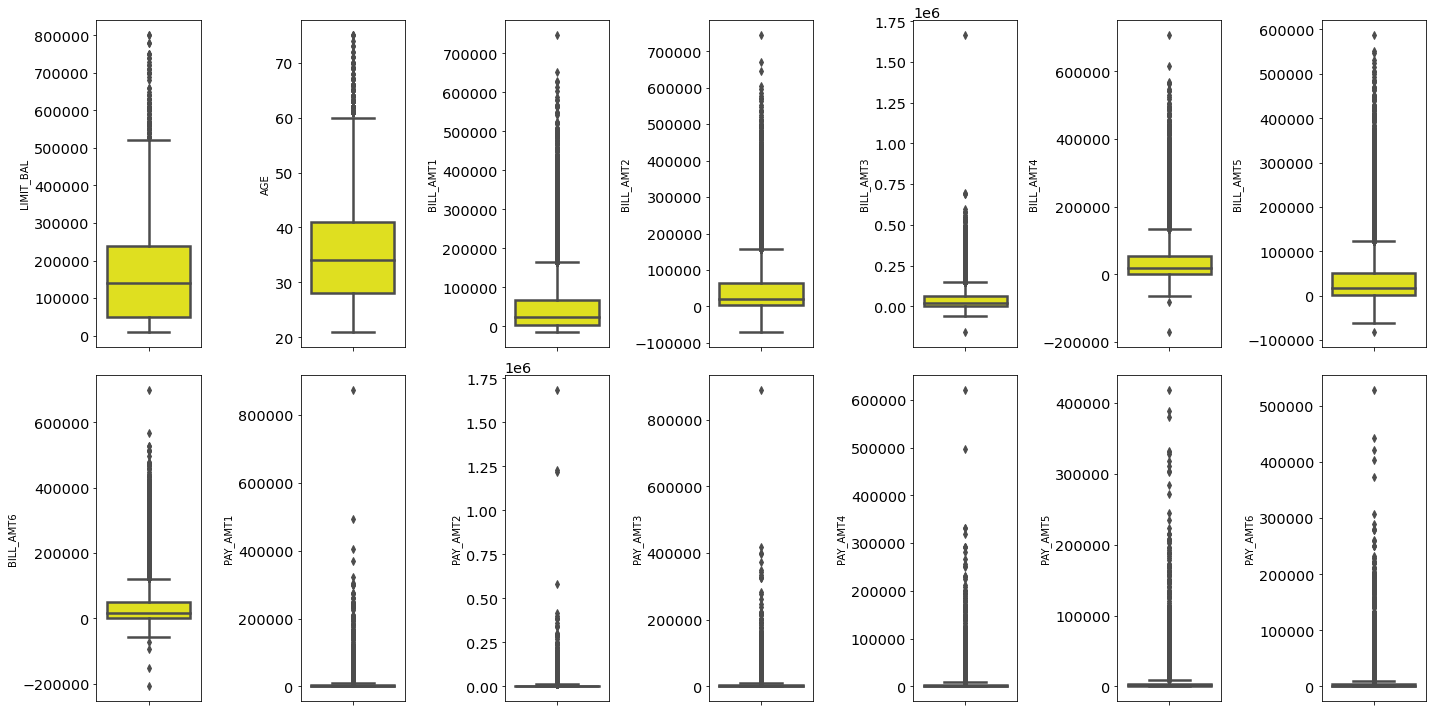

In [15]:
features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
    plt.subplot(2, len(features)/2, i+1)
    sns.boxplot(y=df_train_20D8GL3[features[i]], color='yellow', orient='v')
    plt.tight_layout()

Pengamatan:

1. Tampak disetiap numerikal data pada dataset memiliki outlier semua. (untuk penanganan yang dilakukan yaitu dengan memfilter outlier dengan menggunakan z score, kemudian akan dilakukan pengecekan distribusi dari data setelah difilter dengan z score)
2. `BILL_AMT3 - BILL_AMT6` memiliki outlier dikedua sisinya baik di bagian positif atau negatif. (seperti dijelaskan diatas untuk `BILL_AMT` memang terdapat keanehan dari datanya yaitu ada data yang bernilai negatif dan sepertinya akan di-drop pada saat data preprocessing)

# KernelDestinyEstimationplot untuk melihat persebaran datanya, apakah sudah normal atau condong kekanan atau kekiri

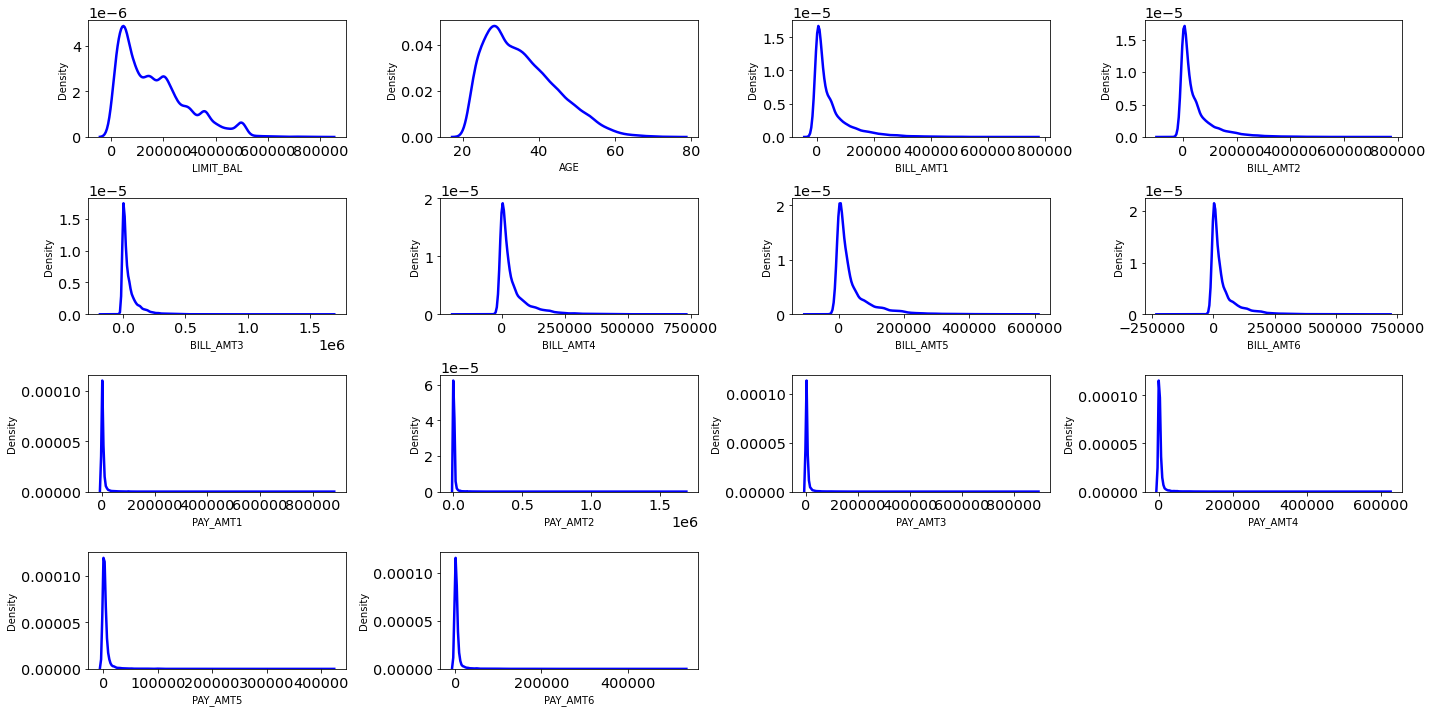

In [16]:
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
    plt.subplot(4, len(features)/3, i+1)
    sns.kdeplot(x=df_train_20D8GL3[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

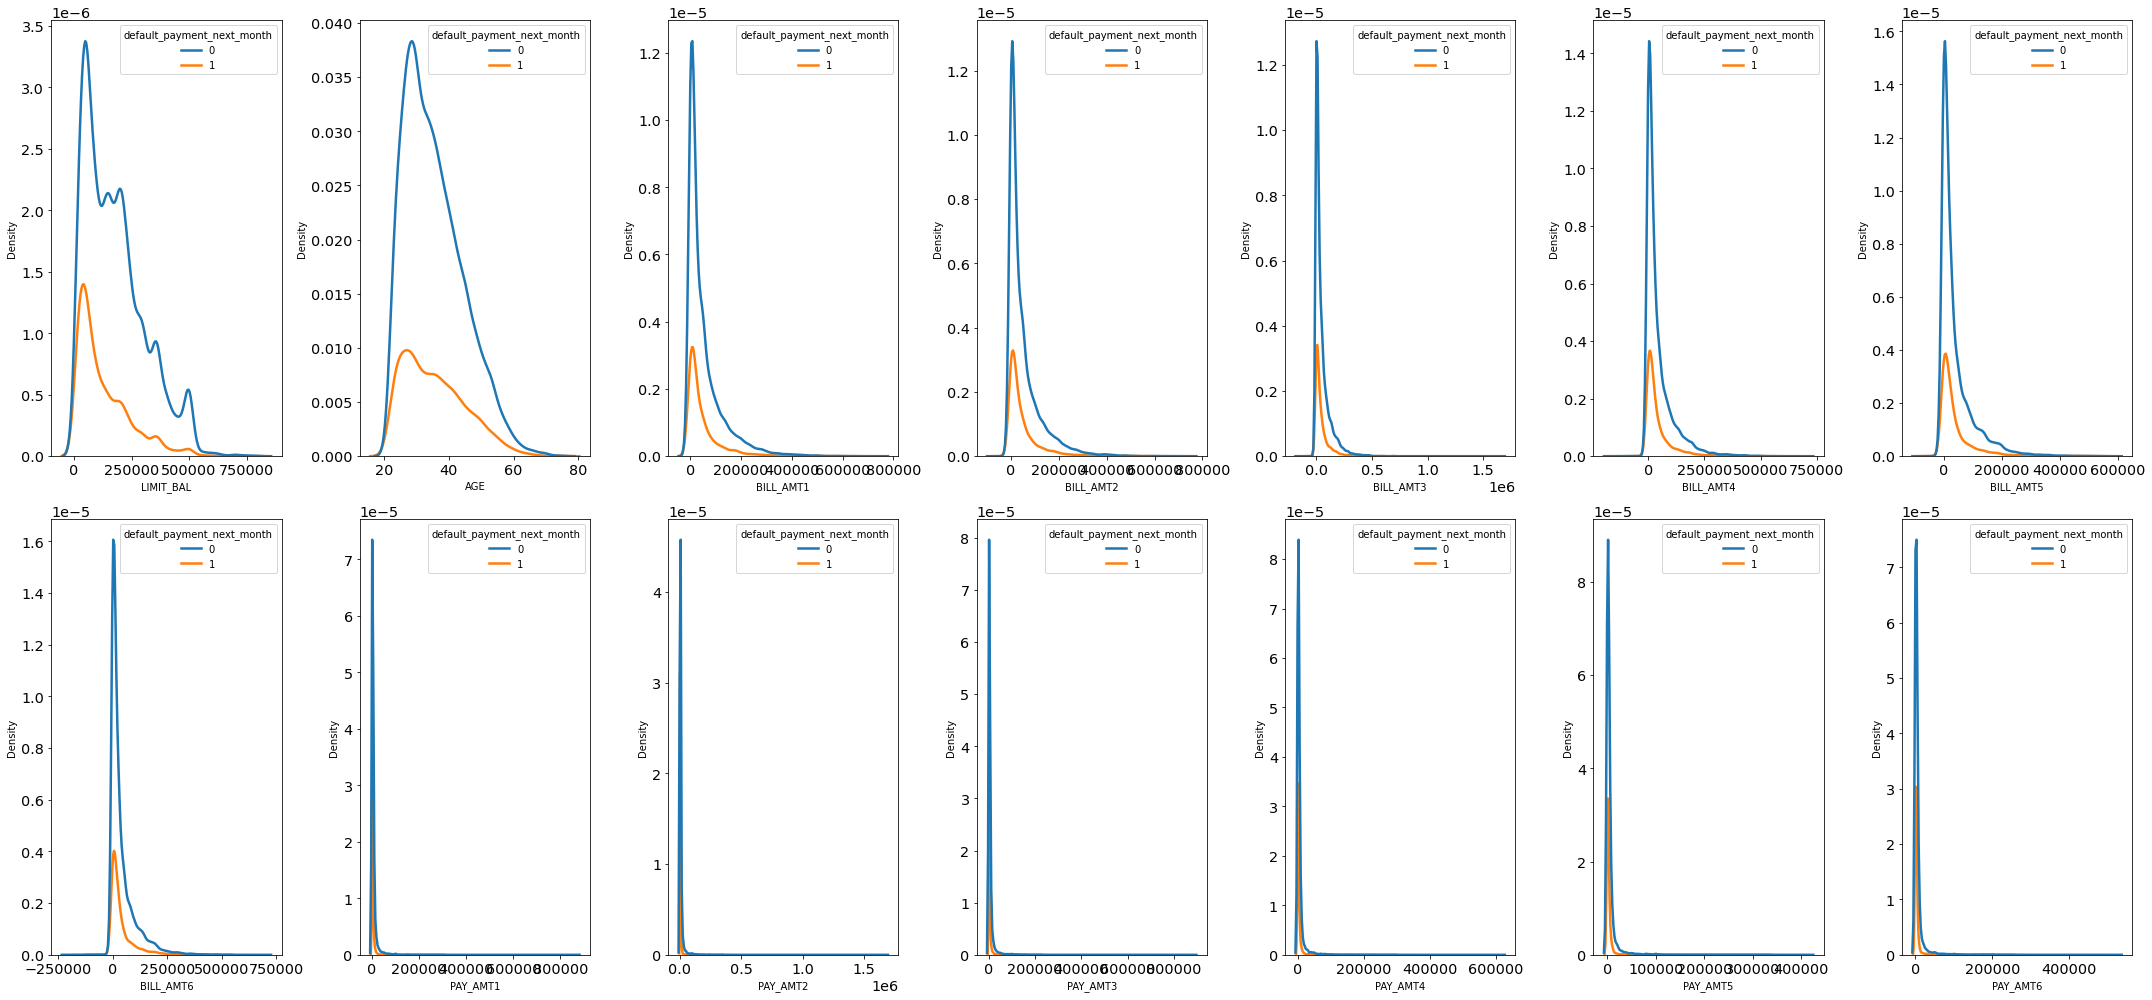

In [30]:
for i in range(0, len(features)):
    plt.subplot(2, len(features)/2, i+1)
    sns.kdeplot(x=df_train_20D8GL3[features[i]], hue='default_payment_next_month', data=df_train_20D8GL3)
    plt.tight_layout()

#Pengamatan:

1. Berdasarkan visualisasi diatas, semua numerical data pada dataset tampak skew ke kanan semua 
(penanganannya mungkin akan dilakukan log transformation untuk mengatasi distribusi yang skew tersebut setelah dilakukan filtrasi outlier)
2. Hanya kolom AGE yang tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)

# Violin plot untuk memastikan kembali, atau hasil kombinasi boxplot dan kernel density estimation plot

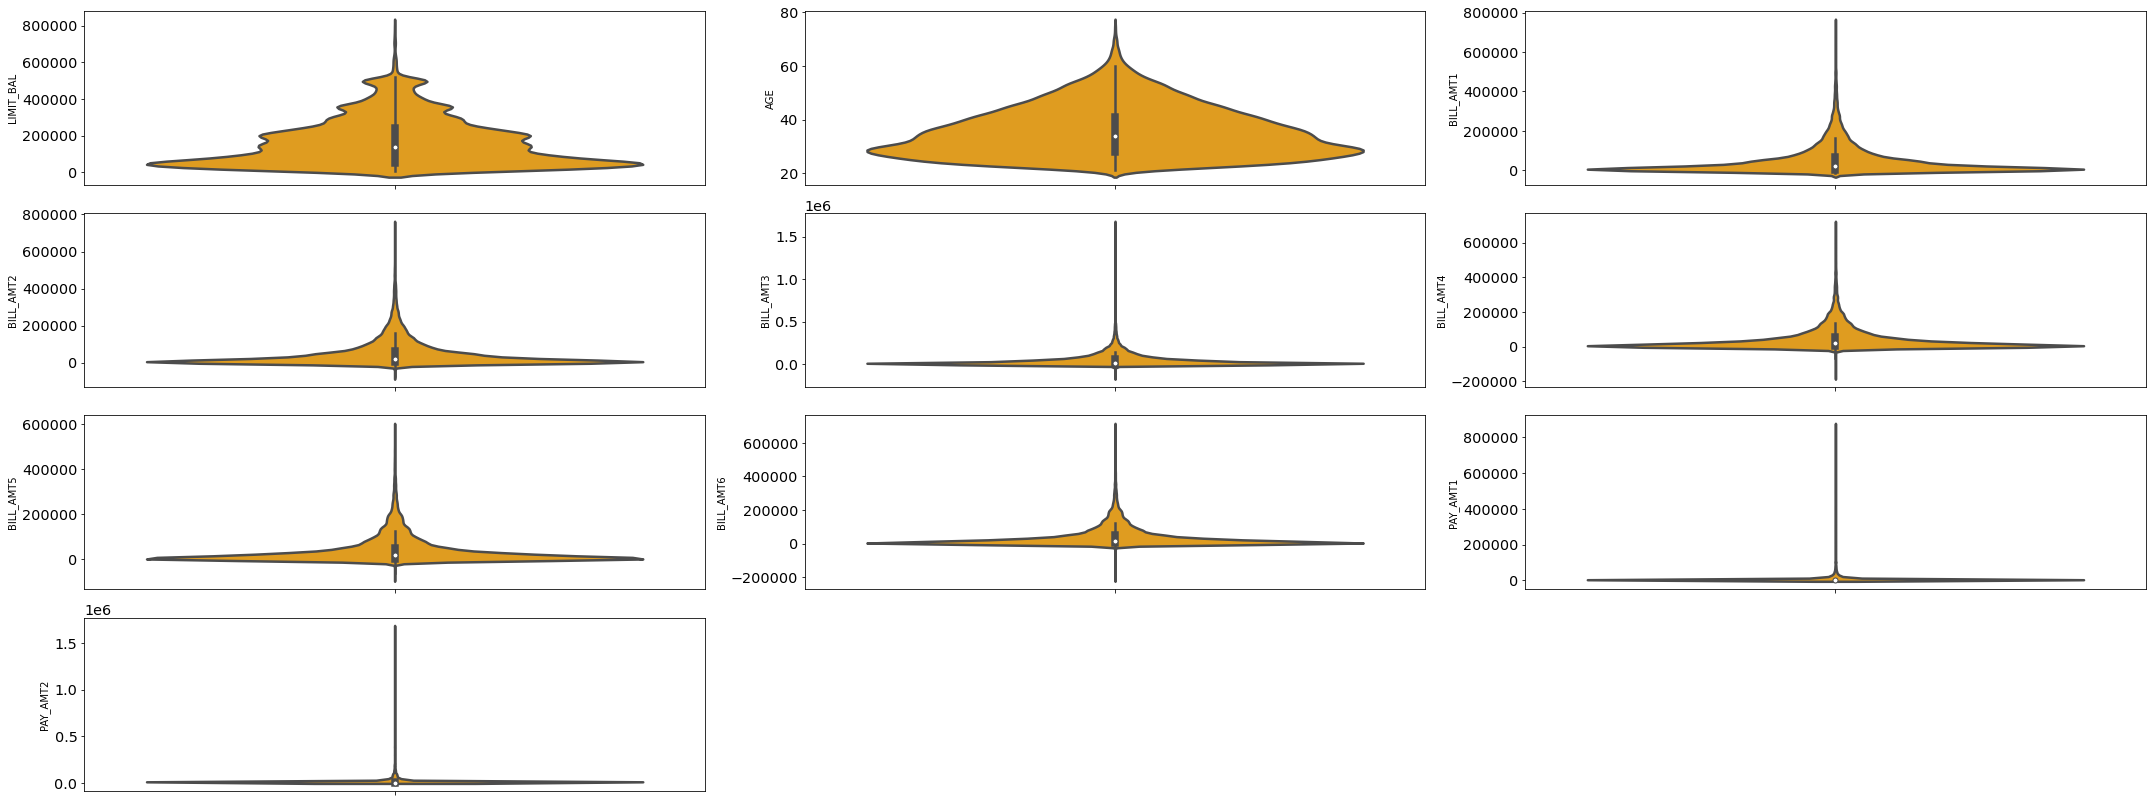

In [17]:
for i in range(0, len(categoricals)):
    plt.subplot(5, 3, i+1)
    sns.violinplot(y = df_train_20D8GL3[features[i]], color='orange', orient='v')
    plt.tight_layout()

# 3. Pengecekan korelasi data

In [18]:
df_train_20D8GL3.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,1.000000,0.029309,0.023360,0.035009,-0.025129,0.017725,-0.029347,-0.011643,-0.019846,-0.004922,-0.021758,-0.019846,0.014660,0.015419,0.018707,0.038737,0.015078,0.015758,0.007428,0.004978,0.043774,0.012707,0.003834,0.001453,-0.016701
LIMIT_BAL,0.029309,1.000000,0.029683,-0.216762,-0.110451,0.143206,-0.272059,-0.297323,-0.290059,-0.269652,-0.253399,-0.235601,0.290539,0.283654,0.288947,0.297446,0.297377,0.291518,0.194995,0.176589,0.206638,0.199472,0.221325,0.215073,-0.159163
SEX,0.023360,0.029683,1.000000,0.011012,-0.033930,-0.092907,-0.061232,-0.072602,-0.064406,-0.061242,-0.055920,-0.045045,-0.031595,-0.030287,-0.023328,-0.017430,-0.014278,-0.013546,0.003907,0.000398,-0.003920,0.000042,0.002165,0.003759,-0.037634
EDUCATION,0.035009,-0.216762,0.011012,1.000000,-0.143085,0.172253,0.105815,0.119132,0.110223,0.103607,0.094702,0.080033,0.027826,0.022834,0.015698,0.002318,-0.005243,-0.006436,-0.042164,-0.032573,-0.045854,-0.041620,-0.035620,-0.031098,0.021347
MARRIAGE,-0.025129,-0.110451,-0.033930,-0.143085,1.000000,-0.414239,0.029420,0.032403,0.043988,0.042245,0.044779,0.043123,-0.026133,-0.023962,-0.027713,-0.024648,-0.026143,-0.020930,-0.002227,-0.006634,0.000018,-0.014061,-0.003375,-0.005555,-0.016888
AGE,0.017725,0.143206,-0.092907,0.172253,-0.414239,1.000000,-0.043313,-0.055090,-0.058891,-0.057324,-0.061018,-0.050668,0.054186,0.053819,0.053439,0.049968,0.048377,0.047465,0.025439,0.022501,0.025842,0.026427,0.024296,0.016846,0.006664
PAY_0,-0.029347,-0.272059,-0.061232,0.105815,0.029420,-0.043313,1.000000,0.669158,0.573421,0.540895,0.506958,0.472545,0.183120,0.184325,0.173635,0.175132,0.176809,0.172138,-0.085340,-0.070403,-0.079509,-0.065830,-0.061725,-0.065042,0.325851
PAY_2,-0.011643,-0.297323,-0.072602,0.119132,0.032403,-0.055090,0.669158,1.000000,0.768036,0.662055,0.621775,0.573462,0.230246,0.229404,0.217190,0.218108,0.217404,0.215069,-0.083156,-0.060032,-0.064262,-0.051836,-0.041990,-0.042252,0.263546
PAY_3,-0.019846,-0.290059,-0.064406,0.110223,0.043988,-0.058891,0.573421,0.768036,1.000000,0.780378,0.692843,0.635996,0.205603,0.233152,0.222866,0.224166,0.222599,0.220174,-0.004458,-0.063249,-0.058944,-0.050562,-0.034179,-0.039050,0.235930
PAY_4,-0.004922,-0.269652,-0.061242,0.103607,0.042245,-0.057324,0.540895,0.662055,0.780378,1.000000,0.826037,0.720236,0.199066,0.222600,0.240683,0.242503,0.240128,0.236392,-0.014070,-0.001616,-0.073125,-0.046960,-0.032112,-0.031699,0.220079


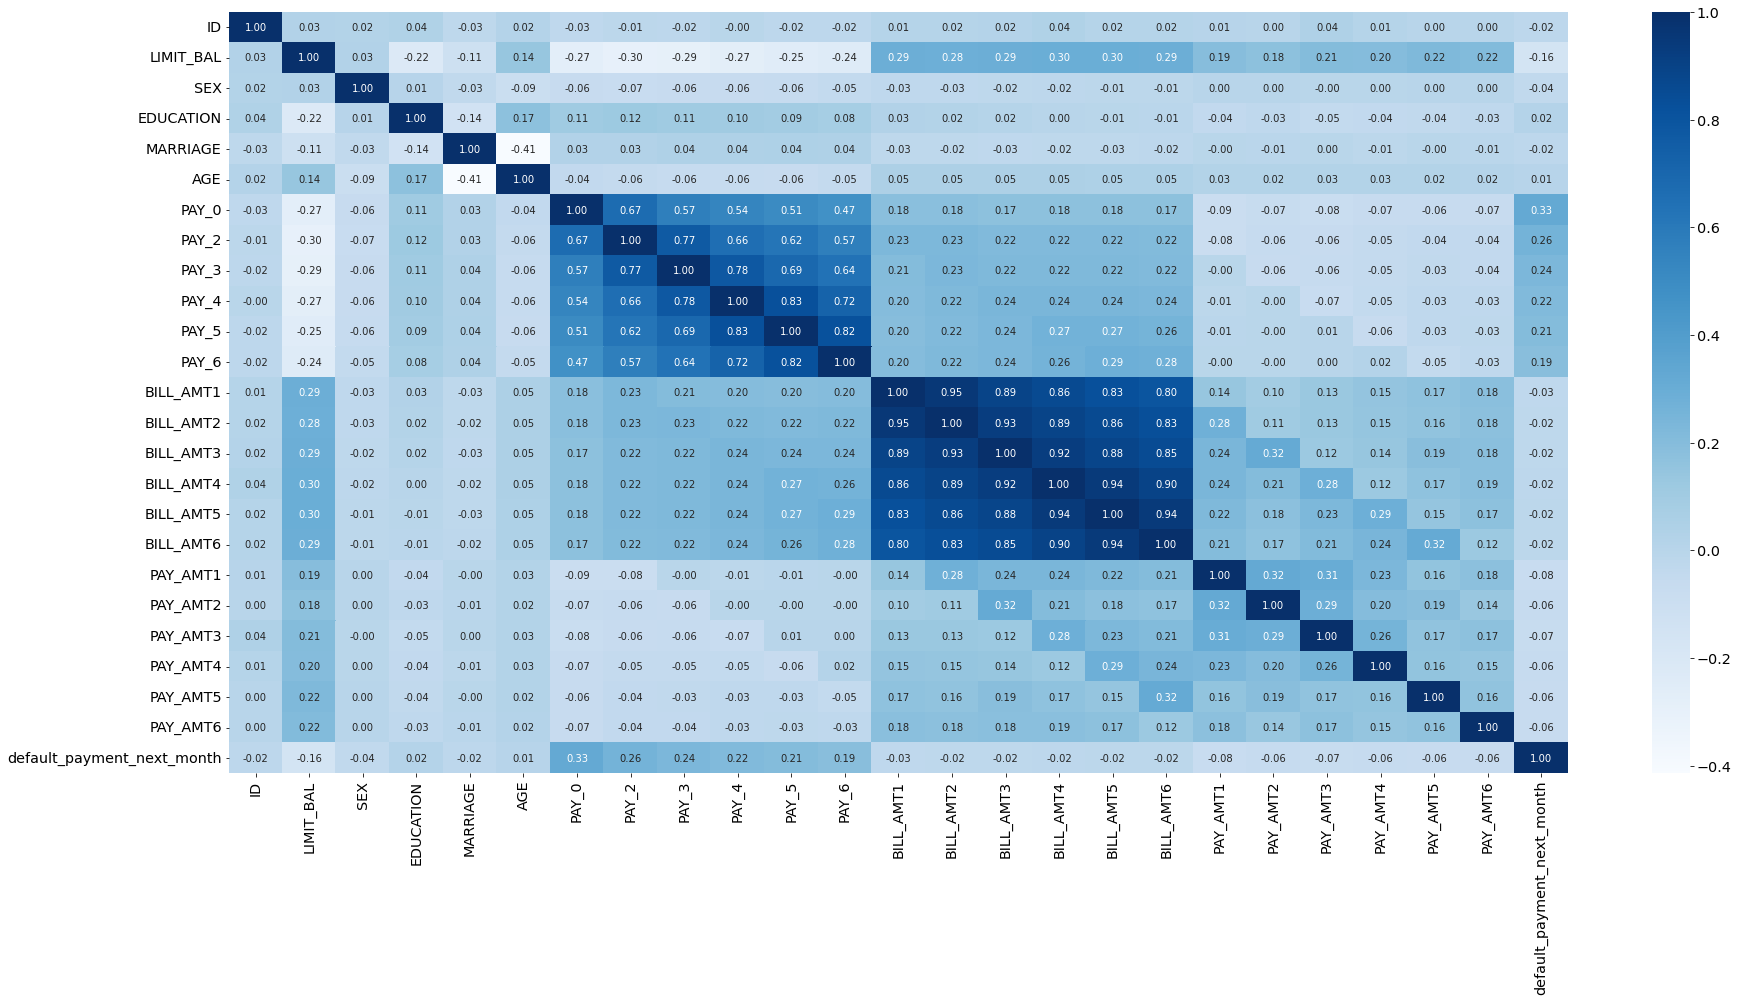

In [19]:
sns.heatmap(df_train_20D8GL3.corr(), cmap='Blues', annot=True, fmt='.2f')

#Pengamatan:

1. Target default_payment_next_month 
    * memiliki korelasi positif lemah dengan `LIMIT_BAL, Pay_0, Pay_1, Pay_2, Pay_3, Pay_4, Pay_5, Pay_6` yang selanjutkan akan digunakan pada model.
    * tidak memiliki korelasi positif cukup kuat terhadap feature apapun.
2. korelasi antar-feature
    * Terdapat banyak sekali feature yang saling berkolerasi positif cukup kuat (`BILL_AMT` dengan `BILL_AMT` dan `PAY_AMT` dengan `PAY_AMT`) dan ada juga featur yang berkorelasi negatif lemah (`AGE - MARRIAGE`)

# 4. Penjelasan langkah-langkah yang digunakan untuk meningkatkan performa model

1. Terdapat penamaan kolom yang kurang selaras yaitu setelah kolom `PAY_0` langsung ke `PAY_2`, sementara pada `BILL_AMT` dan `PAY_AMT` diawali dengan 1 bukan 0 dan definisi kolomnya urut sesuai defngan `BILL_AMT` dan `PAY_AMT`.
    * Kita akan merename `PAY_0` menjadi `PAY_1`

2. Kolom `ID` merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
    * Akan didrop

3. Terdapat nilai-nilai yang belum terdefinisi pada kolom `EDUCATION, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, MARRIAGE`
    * akan didrop atau di redefinisi tergantung jumlah data yang tidak terdefinisi tersebut.

3. Terdapat nilai minus pada nilai min untuk kolom `BILL_AMT1 - BILL_AMT6`, dimana seharusnya untuk jumlah bill statement tidak ada yang bernilai negatif.
    * Perlu eksplorasi lebih dalam mengenai BILL_AMT yang minus ini karena jika didrop akan mengurangi jumlah data cukup banyak, kemungkinan BILL_AMT bernilai negatif karena kelebihan bayar tagihan pada bulan sebelumnya..

4. Tampak disetiap numerikal data pada dataset memiliki outlier semua pada visualisasi Boxplot.
    * Untuk penanganan yang dilakukan yaitu dengan memfilter outlier dengan menggunakan z score, kemudian akan dilakukan pengecekan distribusi dari data setelah difilter dengan z score

5. Berdasarkan visualisasi KernelDestinyEstimationplot, semua numerical data pada dataset tampak skew ke kanan semua 
    * Penanganannya mungkin akan dilakukan log transformation untuk mengatasi distribusi yang skew tersebut setelah dilakukan filtrasi outlier)

# 5. Insight yang relevan terhadap masalah

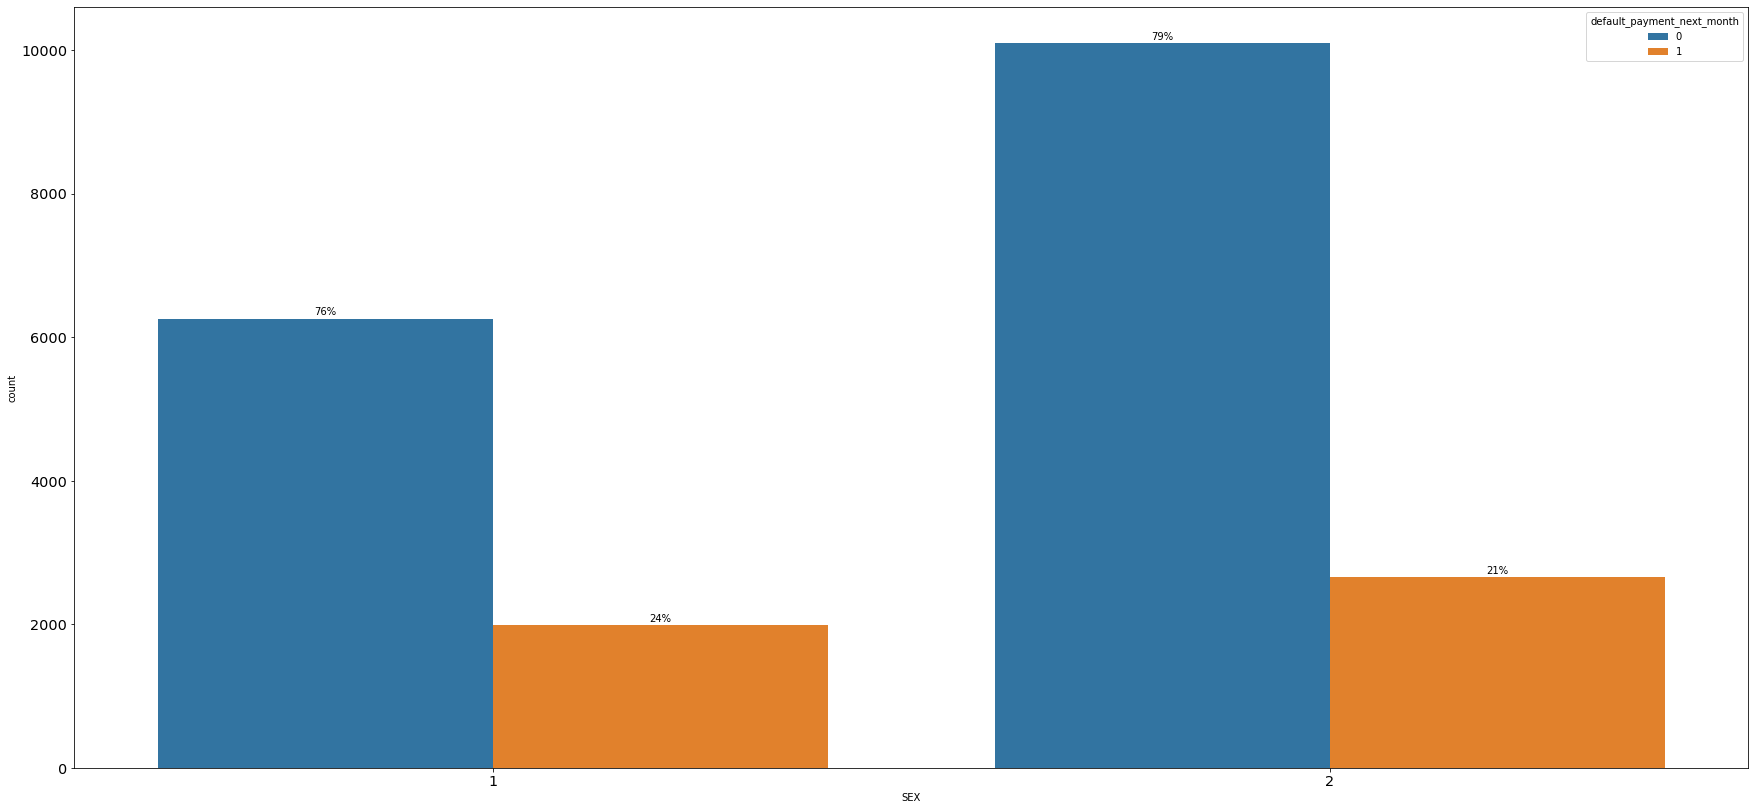

In [20]:
df_1 = df_train_20D8GL3.groupby(['SEX','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()
temp = df_train_20D8GL3.groupby(['SEX']).agg({'ID':'nunique'}).reset_index()

df_1 = df_1.merge(temp, on='SEX')
df_1.columns = ['SEX', 'default_payment_next_month', 'count', 'total']
# plt.subplot(1, 3, 1)
splot = sns.barplot(x = 'SEX', y = 'count', data = df_1, hue='default_payment_next_month')

i = 0 # indexing untuk mendapatkan nilai total
for p in splot.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / df_1['total'][i]) 
    i += 2 # penambahan index untuk print SEX yang 0
    if (i>3): # untuk annotate untuk print SEX yang 1
        i = 1
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 50
    splot.annotate(percentage, (x, y),ha='center', color='#000')

# Pengamatan:
1.  SEX perempuan (2) mendominasi dataset
2.  Persentase debitur yang default dibulan depan paling banyak pada laki-laki yaitu sebesar 24% dari jumlah laki-laki cenderung akan default dibanding kan perempuan yang hanya sebesar  21% dari jumlah keseluruhan perempuan.
    

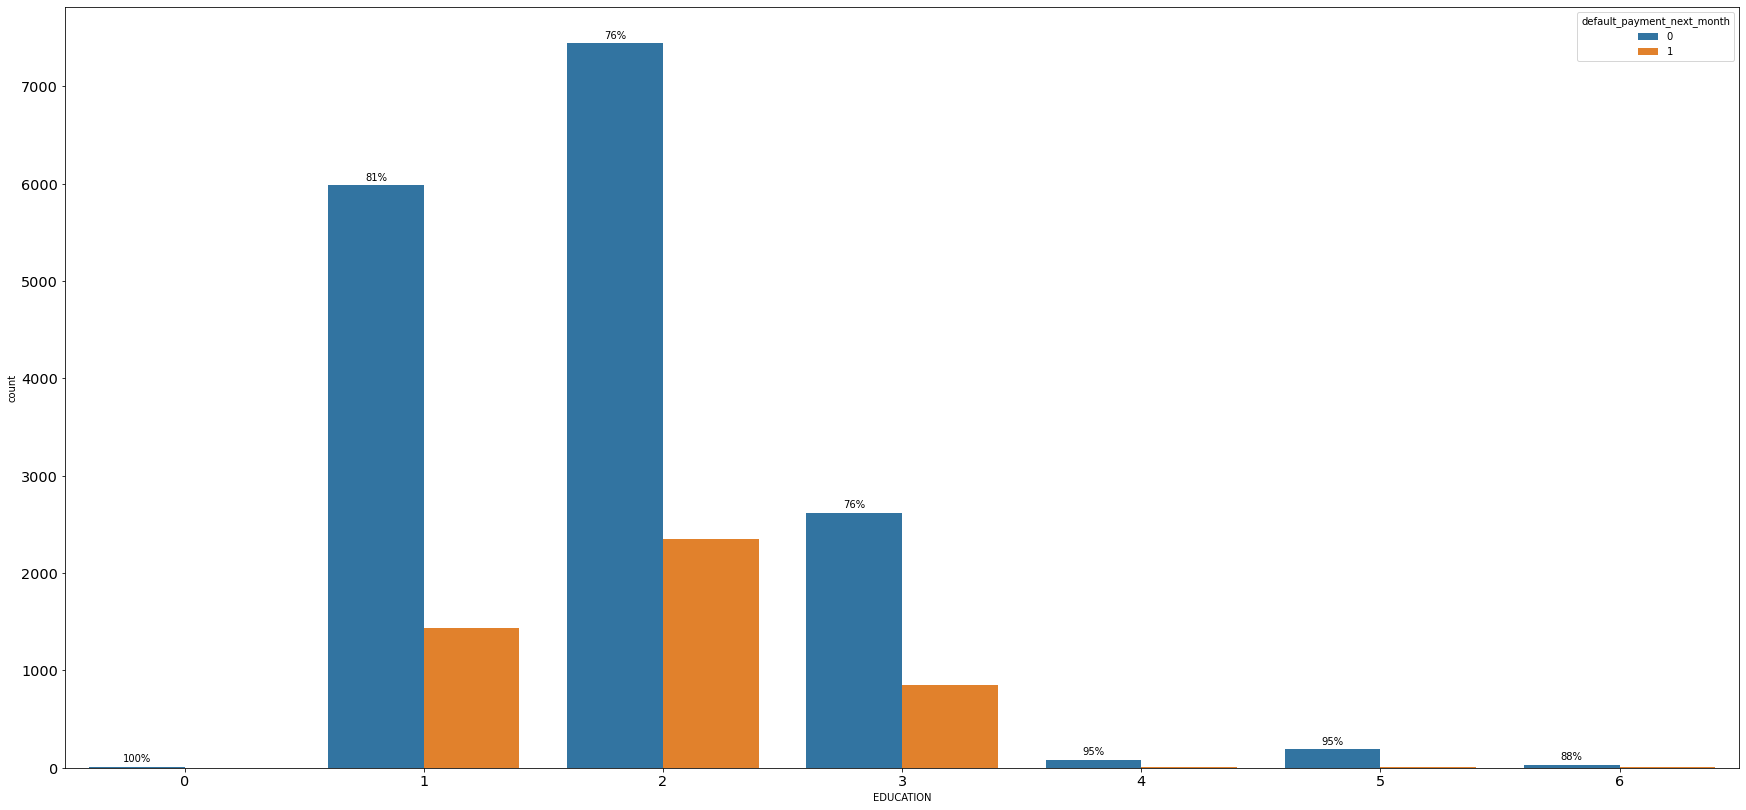

In [21]:
df_2 = df_train_20D8GL3.groupby(['EDUCATION','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()

temp = df_train_20D8GL3.groupby(['EDUCATION']).agg({'ID':'nunique'}).reset_index()

df_2 = df_2.merge(temp, on='EDUCATION')
df_2.columns = ['EDUCATION', 'default_payment_next_month', 'count', 'total']

df_2['percentage'] = 100*df_2['count']/df_2['total']

splot = sns.barplot(x = 'EDUCATION', y = 'count', data = df_2, hue='default_payment_next_month')

i = 0
for p in splot.patches:
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 50
    percentage = '{:.0f}%'.format(df_2['percentage'][i])
    if i == 0:
      splot.annotate(percentage, (x, y),ha='center', color='#000')
      i += 1
    else:
      if (i<10): 
        i += 2
      else: 
        splot.annotate(percentage, (x, y),ha='center', color='#000')
        break
      splot.annotate(percentage, (x, y),ha='center', color='#000')
      
    

# Pengamatan:

1. debitur didominasi oleh orang dengan status single (2) dan disusul dengan status married (1)
2. Namun jumlah debitur yang default paling banyak ditemukan pada debitur dengan status single (2) dan divorced (3) yaitu sekitar 24% dari total debitur dalam kategori tersebut

# 6. Insight untuk menentukan rekomendasi bisnis

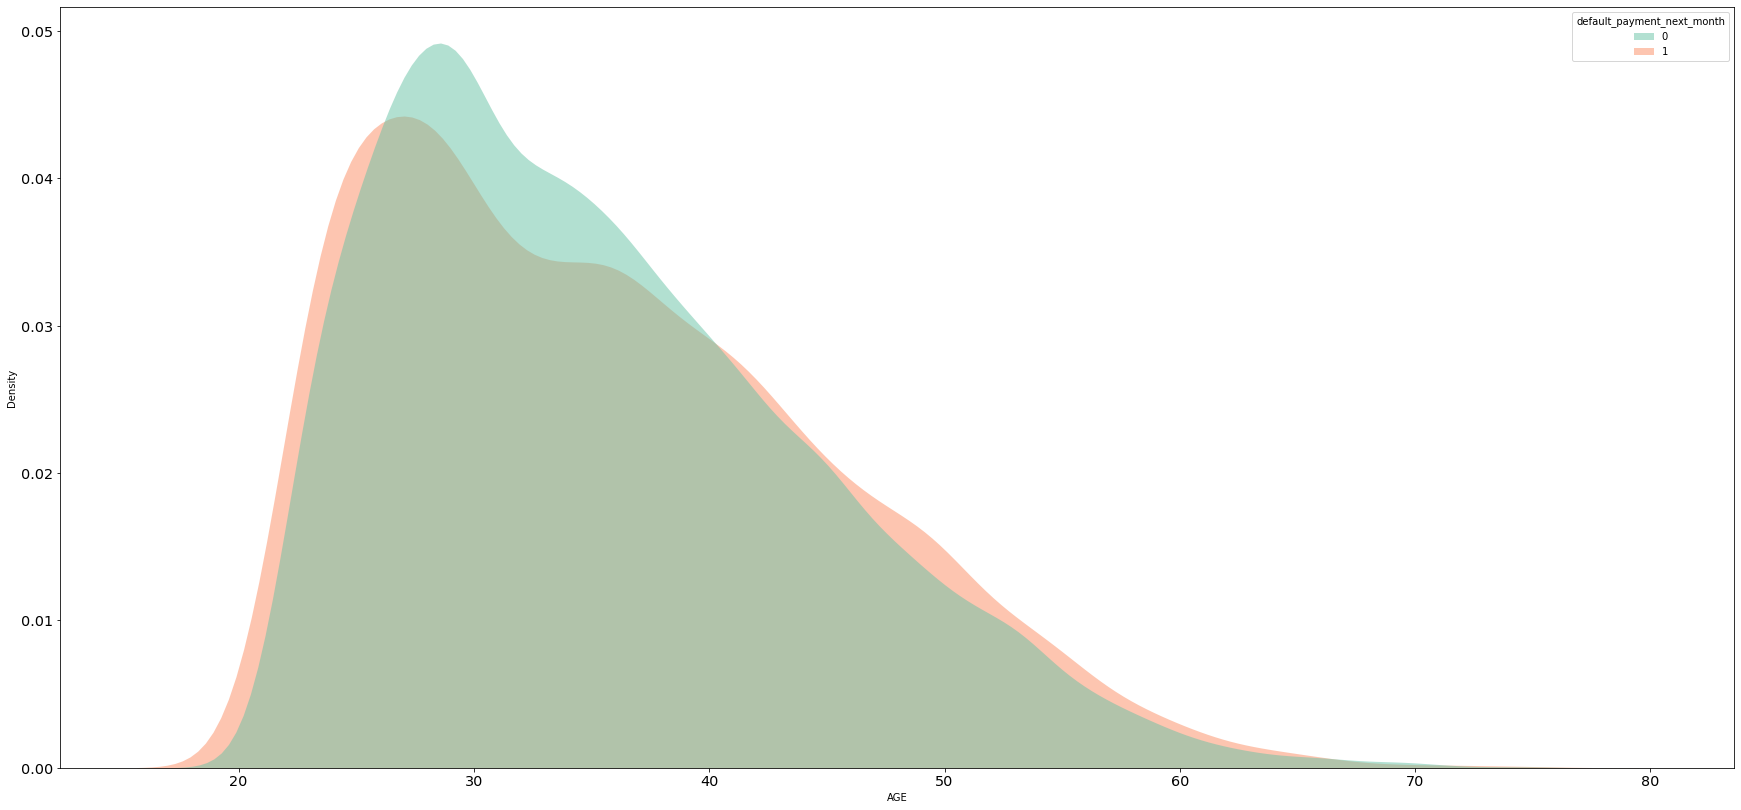

In [22]:
sns.kdeplot(
   data=df_train_20D8GL3, x="AGE", hue="default_payment_next_month",
   fill=True, common_norm=False, palette="Set2",
   alpha=.5, linewidth=0,
)

# Pengamatan
1. Usia debitur yang mendominasi baik default maupun tidak adalah sama yaitu berada diusia antara 25 tahun sampai 30 tahun

# Rekomendasi bisnis:
* perlu dilakukan screening yang lebih ketat mengenai kelayakan calon customer

# 7. Visualisasi dari insight-insight yang ada

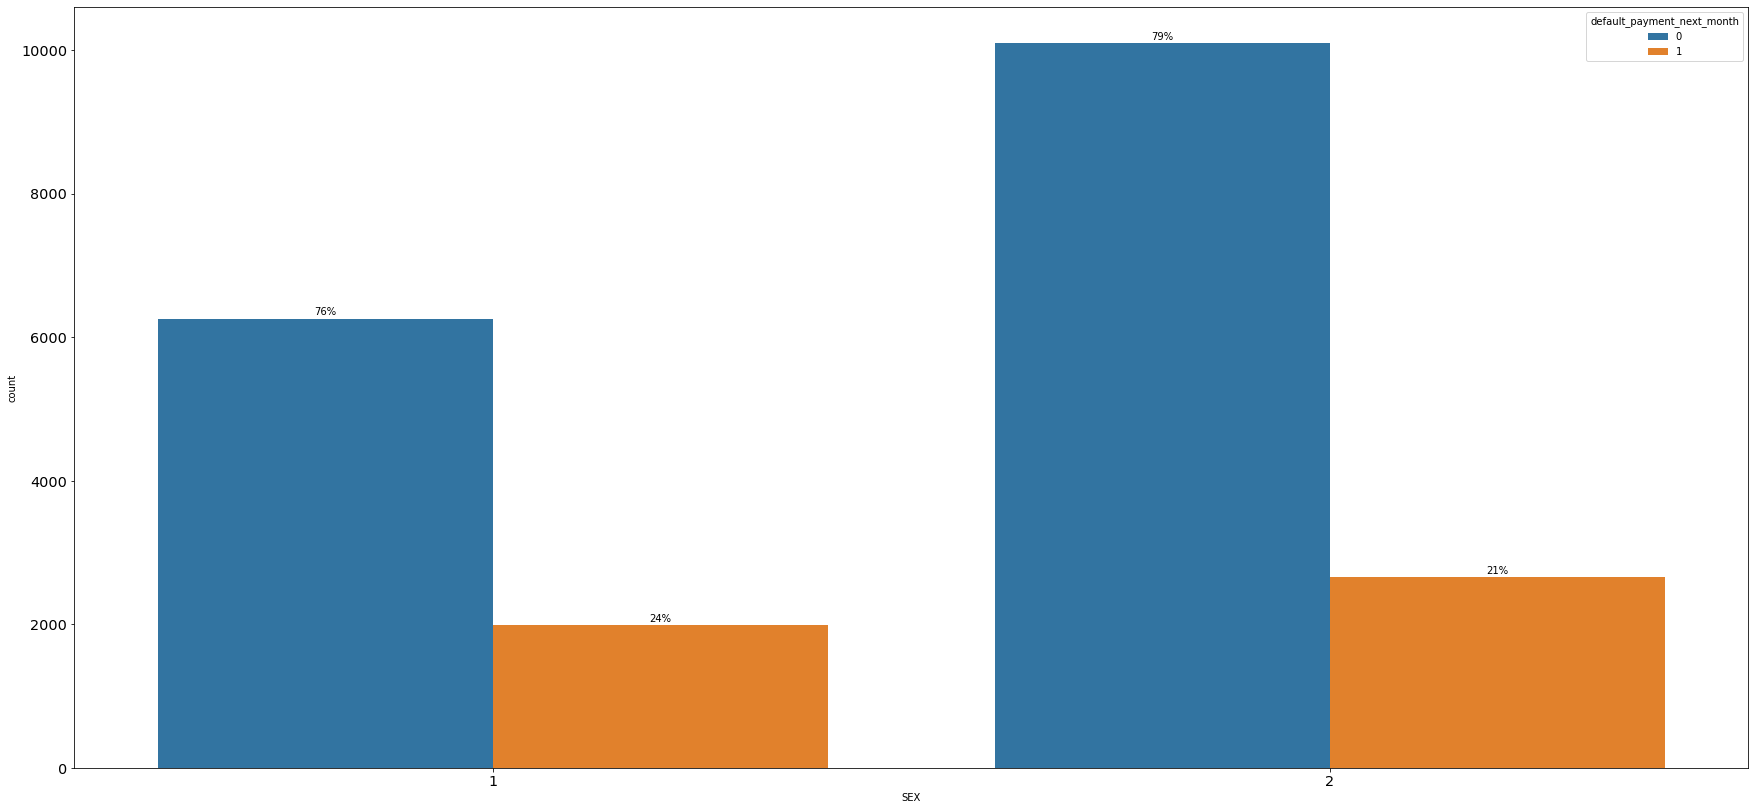

In [24]:
df_1 = df_train_20D8GL3.groupby(['SEX','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()
temp = df_train_20D8GL3.groupby(['SEX']).agg({'ID':'nunique'}).reset_index()

df_1 = df_1.merge(temp, on='SEX')
df_1.columns = ['SEX', 'default_payment_next_month', 'count', 'total']
# plt.subplot(1, 3, 1)
splot = sns.barplot(x = 'SEX', y = 'count', data = df_1, hue='default_payment_next_month')

i = 0 # indexing untuk mendapatkan nilai total
for p in splot.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / df_1['total'][i]) 
    i += 2 # penambahan index untuk print SEX yang 0
    if (i>3): # untuk annotate untuk print SEX yang 1
        i = 1
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 50
    splot.annotate(percentage, (x, y),ha='center', color='#000')

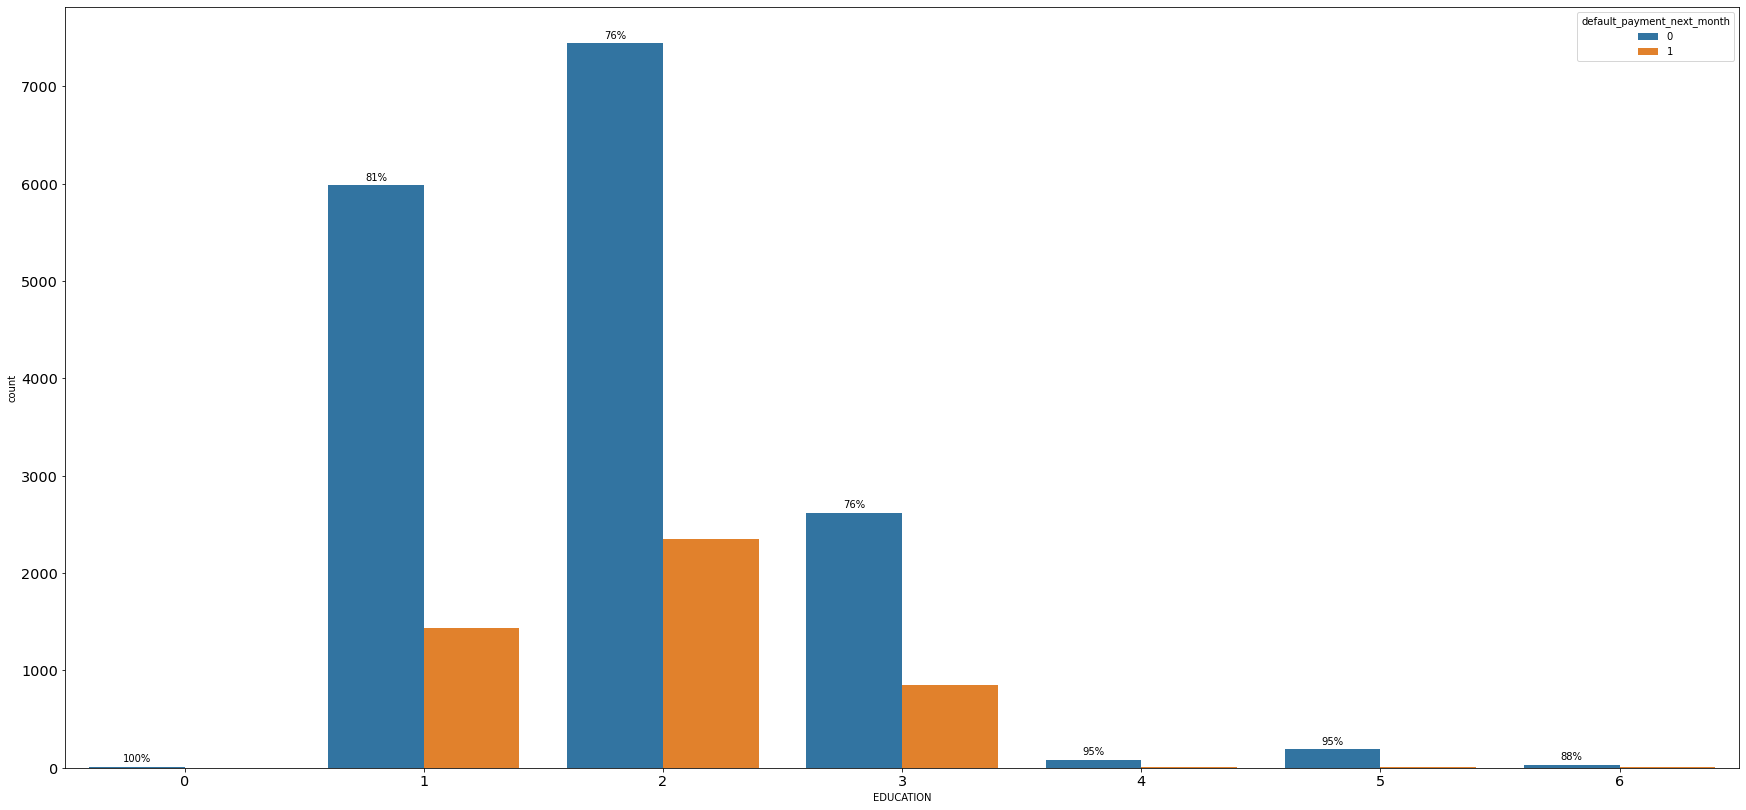

In [25]:
df_2 = df_train_20D8GL3.groupby(['EDUCATION','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()

temp = df_train_20D8GL3.groupby(['EDUCATION']).agg({'ID':'nunique'}).reset_index()

df_2 = df_2.merge(temp, on='EDUCATION')
df_2.columns = ['EDUCATION', 'default_payment_next_month', 'count', 'total']

df_2['percentage'] = 100*df_2['count']/df_2['total']

splot = sns.barplot(x = 'EDUCATION', y = 'count', data = df_2, hue='default_payment_next_month')

i = 0
for p in splot.patches:
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 50
    percentage = '{:.0f}%'.format(df_2['percentage'][i])
    if i == 0:
      splot.annotate(percentage, (x, y),ha='center', color='#000')
      i += 1
    else:
      if (i<10): 
        i += 2
      else: 
        splot.annotate(percentage, (x, y),ha='center', color='#000')
        break
      splot.annotate(percentage, (x, y),ha='center', color='#000')
      
    

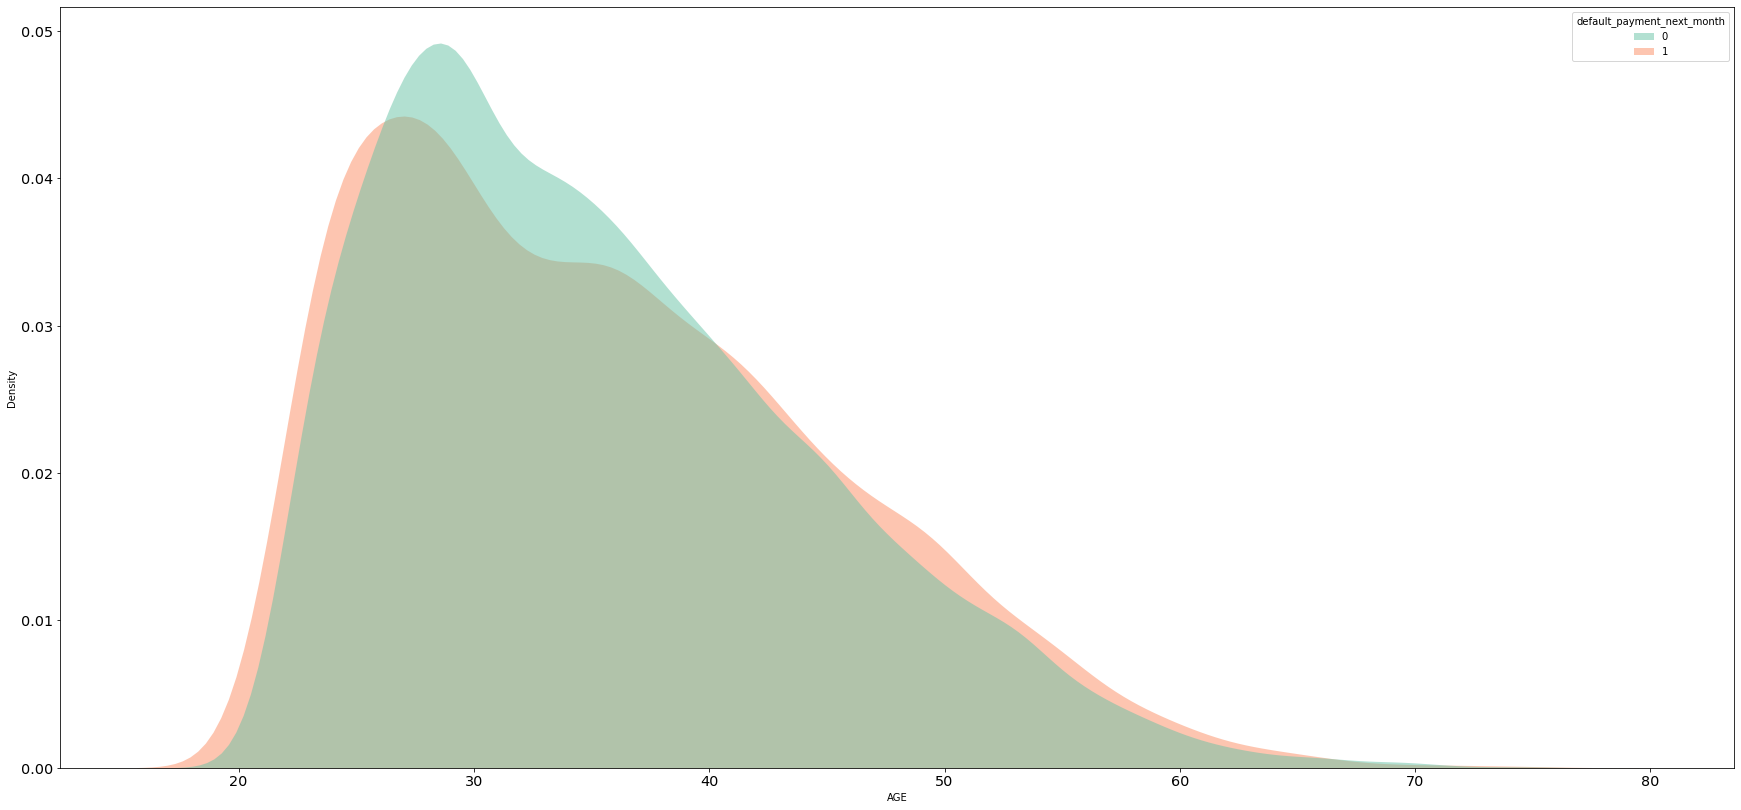

In [26]:
sns.kdeplot(
   data=df_train_20D8GL3, x="AGE", hue="default_payment_next_month",
   fill=True, common_norm=False, palette="Set2",
   alpha=.5, linewidth=0,
)

--------------------------------------------------------------------------------
## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:

1. Dataset terdiri dari 25 kolom dan 21000 baris dan tidak terdapat null value.
2. Setiap kolom telah memiliki tipe data yang sesuai, setiap kolom memiliki value berupa numerik dan tipe datanya sudah sesuai yaitu int.
3. Terdapat penamaan kolom yang kurang selaras yaitu setelah kolom `PAY_0` langsung ke `PAY_2`, sementara pada `BILL_AMT` dan `PAY_AMT` diawali dengan 1 bukan 0 dan definisi kolomnya urut sesuai defngan `BILL_AMT` dan `PAY_AMT`.
4. Kolom `ID` akan didrop karena merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
5. Terdapat nilai yang belum terdefinisi dalam dataset kolom `PAY_0 - PAY_6`, yaitu nilai 0 dan -2.
6. Terdapat nilai yang belum terdefinisi dalam dataset kolom `MARRIAGE`, yaitu nilai 0.
7. Terdapat nilai minus pada nilai min untuk kolom BILL_AMT1 - BILL_AMT6, dimana seharusnya untuk jumlah bill statement tidak ada yang bernilai negatif.
8. Kolom `default_payment_next_month` ternyata bernilai boolean/binary
9. Kolom `SEX, EDUCATION, MARRIAGE, PAY_0 - PAY_6`, `default_payment_next_month` tampaknya merupakan data kategorikal yang direpresentasikan menggunakan numerik.
10. Hanya kolom `AGE` yang tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
11. Kolom `LIMIT_BAL, BILL_AMT1 - BILL_AMT6, PAY_AMT1 - PAY_AMT6` sepertinya right skewed.
    * Kolom `LIMIT_BAL, PAY_AMT1 - PAY_AMT6` memiliki nilai mean > median dan selisih percentil 75 dengan max sangat jauh.
    * `BILL_AMT1 - BILL_AMT6` memiliki nilai mean > median.
12. Pada kolom `EDUCATION` nilai 0 ada 10. Nilai 0 belum terdefinisi
13. Pada kolom `PAY_0` nilai 0 ada 10324, dan nilai -2 ada 1923. nilai 0 dan -2 belum terdefinisi
14. Pada kolom `PAY_2` nilai 0 ada 11043, dan nilai -2 ada 2643. nilai 0 dan -2 belum terdefinisi
15. Pada kolom `PAY_3` nilai 0 ada 11056, dan nilai -2 ada 2868. 
16. Pada kolom `PAY_4` nilai 0 ada 11542, dan nilai -2 ada 3047. 
17. Pada kolom `PAY_5` nilai 0 ada 11852, dan nilai -2 ada 3193. 
18. Pada kolom `PAY_6` nilai 0 ada 11450, dan nilai -2 ada 3427. 
19. Pada kolom `MARRIAGE` nilai 0 ada 36. Nilai 0 belum terdefinisi
20. SEX didominasi oleh kategori 2 (female)
21. EDUCATION didominasi oleh kategori 2 (university)
22. PAY_0 - PAY_6 didominasi oleh kategori 0 (tidak terdefinisi di dataset) dan terdapat jumlah kategori yang cukup banyak
23. MARRIAGE didominasi oleh kategori 2 (single) dan disusul oleh kategori 1 (married)
24. default_payment_next_month didominasi oleh 0 (not default), tampak bahwa terdapat class imbalance pada label.
25. Tampak disetiap numerikal data pada dataset memiliki outlier semua. (untuk penanganan yang dilakukan yaitu dengan memfilter outlier dengan menggunakan z score, kemudian akan dilakukan pengecekan distribusi dari data setelah difilter dengan z score)
26. `BILL_AMT3 - BILL_AMT6` memiliki outlier dikedua sisinya baik di bagian positif atau negatif. (seperti dijelaskan diatas untuk `BILL_AMT` memang terdapat keanehan dari datanya yaitu ada data yang bernilai negatif dan sepertinya akan di-drop pada saat data preprocessing)
27. Berdasarkan visualisasi diatas, semua numerical data pada dataset tampak skew ke kanan semua 
(penanganannya mungkin akan dilakukan log transformation untuk mengatasi distribusi yang skew tersebut setelah dilakukan filtrasi outlier)
28. Hanya kolom AGE yang tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
29. Korelasi featurs dengan target default_payment_next_month 
    * memiliki korelasi positif lemah dengan `LIMIT_BAL, Pay_0, Pay_1, Pay_2, Pay_3, Pay_4, Pay_5, Pay_6` yang selanjutkan akan digunakan pada model.
    * tidak memiliki korelasi positif cukup kuat terhadap feature apapun.
30. korelasi antar-feature
    * Terdapat banyak sekali feature yang saling berkolerasi positif cukup kuat (`BILL_AMT` dengan `BILL_AMT` dan `PAY_AMT` dengan `PAY_AMT`) dan ada juga featur yang berkorelasi negatif lemah (`AGE - MARRIAGE`)